In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
import timeit

In [3]:
import os
os.getcwd()
os.chdir("/home/aumaron/Desktop/other_projects/")

In [4]:
# Data
customer_transaction = pd.read_csv("datasets/train.csv")

In [5]:
target = np.array(customer_transaction["target"])
train_array = np.array(customer_transaction.iloc[:, 2:])

# Classification

## 2. XGBoost

In [ ]:
# !pip install xgboost

### Binary

In [ ]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

seed = 1
X_train, X_test, y_train, y_test = train_test_split(train_array, target, test_size=0.25, random_state=seed)

In [7]:
start = timeit.default_timer()
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Binary Classifier
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)  # n_splits = 10
i = 0
for train, test in kf.split(train_array, target):
    i += 1
    X_train, X_test = train_array[train], train_array[test]
    y_train, y_test = target[train], target[test]
    
    # Call logistic regression or XGboost based on user input 
    # Within each of those functions, call binary or multiclass based on num of classes and return the relevant metrics
    
    model = XGBClassifier(booster="gbtree",
                          verbosity=0,
                          objective="binary:logistic",
                          eval_metric="logloss",  # For multiclass
                          eta=0.3,
                          gamma=3,  # depth param
                          reg_lambda=0,
                          reg_alpha=0  # Option to change,
                         )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    print(f"----------------For K={i}--------------------")
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    print("precision: {:g}".format(precision))
    print("recall: {:g}".format(recall))
    print("accuracy: {}".format(accuracy))
    f1_score = 2*precision*recall/(precision + recall)
    print("f1_score: {}".format(f1_score))
    print("\n---------------------\n")
    lr_probs = model.predict_proba(X_test)

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = metrics.roc_auc_score(y_test, ns_probs)
    lr_auc = metrics.roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
#     ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
#     lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)
#     # plot the roc curve for the model
#     plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#     plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
#     # axis labels
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     # show the legend
#     plt.legend()
#     # show the plot
#     plt.show()
    
    # predict class values
#     yhat = y_pred
#     lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, lr_probs)
#     lr_f1, lr_auc = metrics.f1_score(y_test, yhat), metrics.auc(lr_recall, lr_precision)
#     # summarize scores
#     print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
#     # plot the precision-recall curves
#     no_skill = len(y_test[y_test==1]) / len(y_test)
#     plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
#     plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
#     # axis labels
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     # show the legend
#     plt.legend()
#     # show the plot
#     plt.show()
    
# add average AUC AUPRC score for all folds
end = timeit.default_timer()
print("TIME TAKEN ->", end - start)

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=1--------------------
precision: 0.675603
recall: 0.250871
accuracy: 0.91265
f1_score: 0.3658802177858439

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.860


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=2--------------------
precision: 0.689962
recall: 0.270284
accuracy: 0.9145
f1_score: 0.388412017167382

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.863


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=3--------------------
precision: 0.675291
recall: 0.259701
accuracy: 0.91305
f1_score: 0.3751347466762487

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.861


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=4--------------------
precision: 0.672727
recall: 0.257711
accuracy: 0.9128
f1_score: 0.3726618705035971

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.860


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=5--------------------
precision: 0.661312
recall: 0.245771
accuracy: 0.91155
f1_score: 0.358360536815379

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.865


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=6--------------------
precision: 0.704918
recall: 0.278109
accuracy: 0.91575
f1_score: 0.3988583660363896

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.861


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=7--------------------
precision: 0.687254
recall: 0.260199
accuracy: 0.91375
f1_score: 0.3774810537712018

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.862


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=8--------------------
precision: 0.672324
recall: 0.256219
accuracy: 0.9127
f1_score: 0.3710374639769452

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.859


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=9--------------------
precision: 0.664474
recall: 0.251244
accuracy: 0.912
f1_score: 0.36462093862815886

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.861


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------------For K=10--------------------
precision: 0.669774
recall: 0.250249
accuracy: 0.91225
f1_score: 0.3643607388627309

---------------------

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.856
TIME TAKEN -> 1693.61953851


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.856


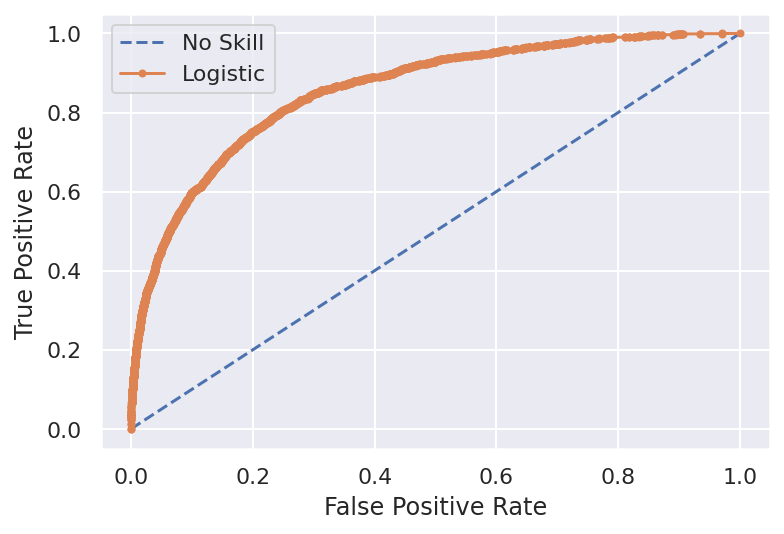

In [8]:
lr_probs = model.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.364 auc=0.493


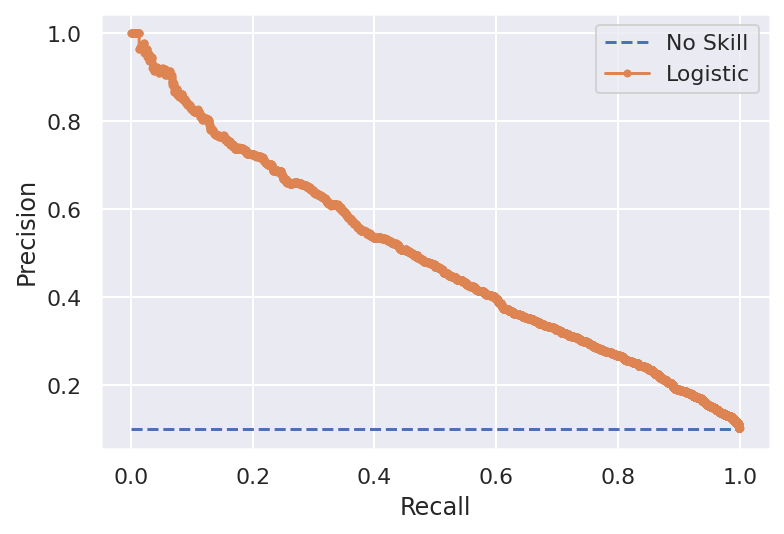

In [9]:
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = y_pred
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = metrics.f1_score(y_test, yhat), metrics.auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


### Multiclass

In [6]:
# Iris dataset
from sklearn.datasets import load_iris

data = load_iris()
train_array = data["data"]
target = data["target"]

In [7]:
train = pd.DataFrame(train_array, columns=["F1", "F2", "F3", "F4"])
train

,F1,F2,F3,F4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# split data into train and test sets
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

seed = 1
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=seed)

In [9]:
# Multiclass 

model = XGBClassifier(booster="gbtree",
                      verbosity=0,
                      objective="multi:softprob",
                      eval_metric="mlogloss",  # For multiclass
                      eta=0.3,
                      gamma=10,
                      reg_lambda=0,
                      reg_alpha=0  # Option to change
                     )

In [10]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
lr_probs = model.predict_proba(X_test)
# predictions = [round(value) for value in y_pred]

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [11]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy: {}".format(accuracy))
lr_probs = model.predict_proba(X_test)

accuracy: 0.9736842105263158


In [17]:
# Important features
f = ["gain", "cover", "weight", "total_gain", "total_cover"]
for _col in train.columns:
    
for _metric in f:
    _val = model.get_booster().get_score(importance_type=_metric)
    print(_val)
    for _key in _val.keys():
        
# By default provide gain


{'F3': 20.31388308083333, 'F4': 28.17414651}
Index(['F1', 'F2', 'F3', 'F4'], dtype='object')
{'F3': 40.80763609166667, 'F4': 41.744876866666665}
Index(['F1', 'F2', 'F3', 'F4'], dtype='object')
{'F3': 12, 'F4': 3}
Index(['F1', 'F2', 'F3', 'F4'], dtype='object')
{'F3': 243.76659696999997, 'F4': 84.52243953}
Index(['F1', 'F2', 'F3', 'F4'], dtype='object')
{'F3': 489.69163310000005, 'F4': 125.2346306}
Index(['F1', 'F2', 'F3', 'F4'], dtype='object')
